<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/homeworks/h1/hw_01.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Jean Luca Nanjari Pacheco

* __Rol__: 20244027-4

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [162]:
# librerias

import os
import cv2
import numpy as np
from PIL import Image

In [163]:
gatito = Image.open(os.path.join("gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [164]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

In [165]:
gatito

Output hidden; open in https://colab.research.google.com to view.

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [166]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

1.2 Iterar por cada uno de los **canales** RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

(RESPUESTA DE 1.1 y 1.2)

In [167]:
secret_list = [] # Creamos la lista "secret_list"

for i in range(0,gatito_np.shape[2]):
  secret_aux = gatito_np[:, :, i] # Se itera por cada capa (que es una matriz de 2160x1280)
  secret_aux[secret_aux%2==0] = 0*255 # Convertimos los pares en 0 y los multiplicamos por 255
  secret_aux[secret_aux%2!=0] = 1*255 # Convertimos los impares en 1 y los multiplicamos por 255
  secret_aux.astype(np.uint8) # cambiamos el dtype a np.uint8
  secret_list.append(secret_aux)

secret_list

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)]

In [168]:
print(f"secret_list tiene {len(secret_list)} elementos") # Verificamos la cantidad de elementos 

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [169]:
secret_np = np.array(np.c_[secret_list[0], secret_list[1], secret_list[2]])  # Concatenamos los arreglos de la lista "secret_list"
secret_np

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [170]:
np.unique(secret_np) # Aseguramos que el rango de valores es de 0 a 255

array([  0, 255], dtype=uint8)

In [171]:
secret_np.dtype # Aseguramos que el dtype sea np.uint8

dtype('uint8')

In [172]:
secret_img = Image.fromarray(secret_np, mode="L") # Creamos la variable "secret_img"

Ahora puedes ver el resultado!

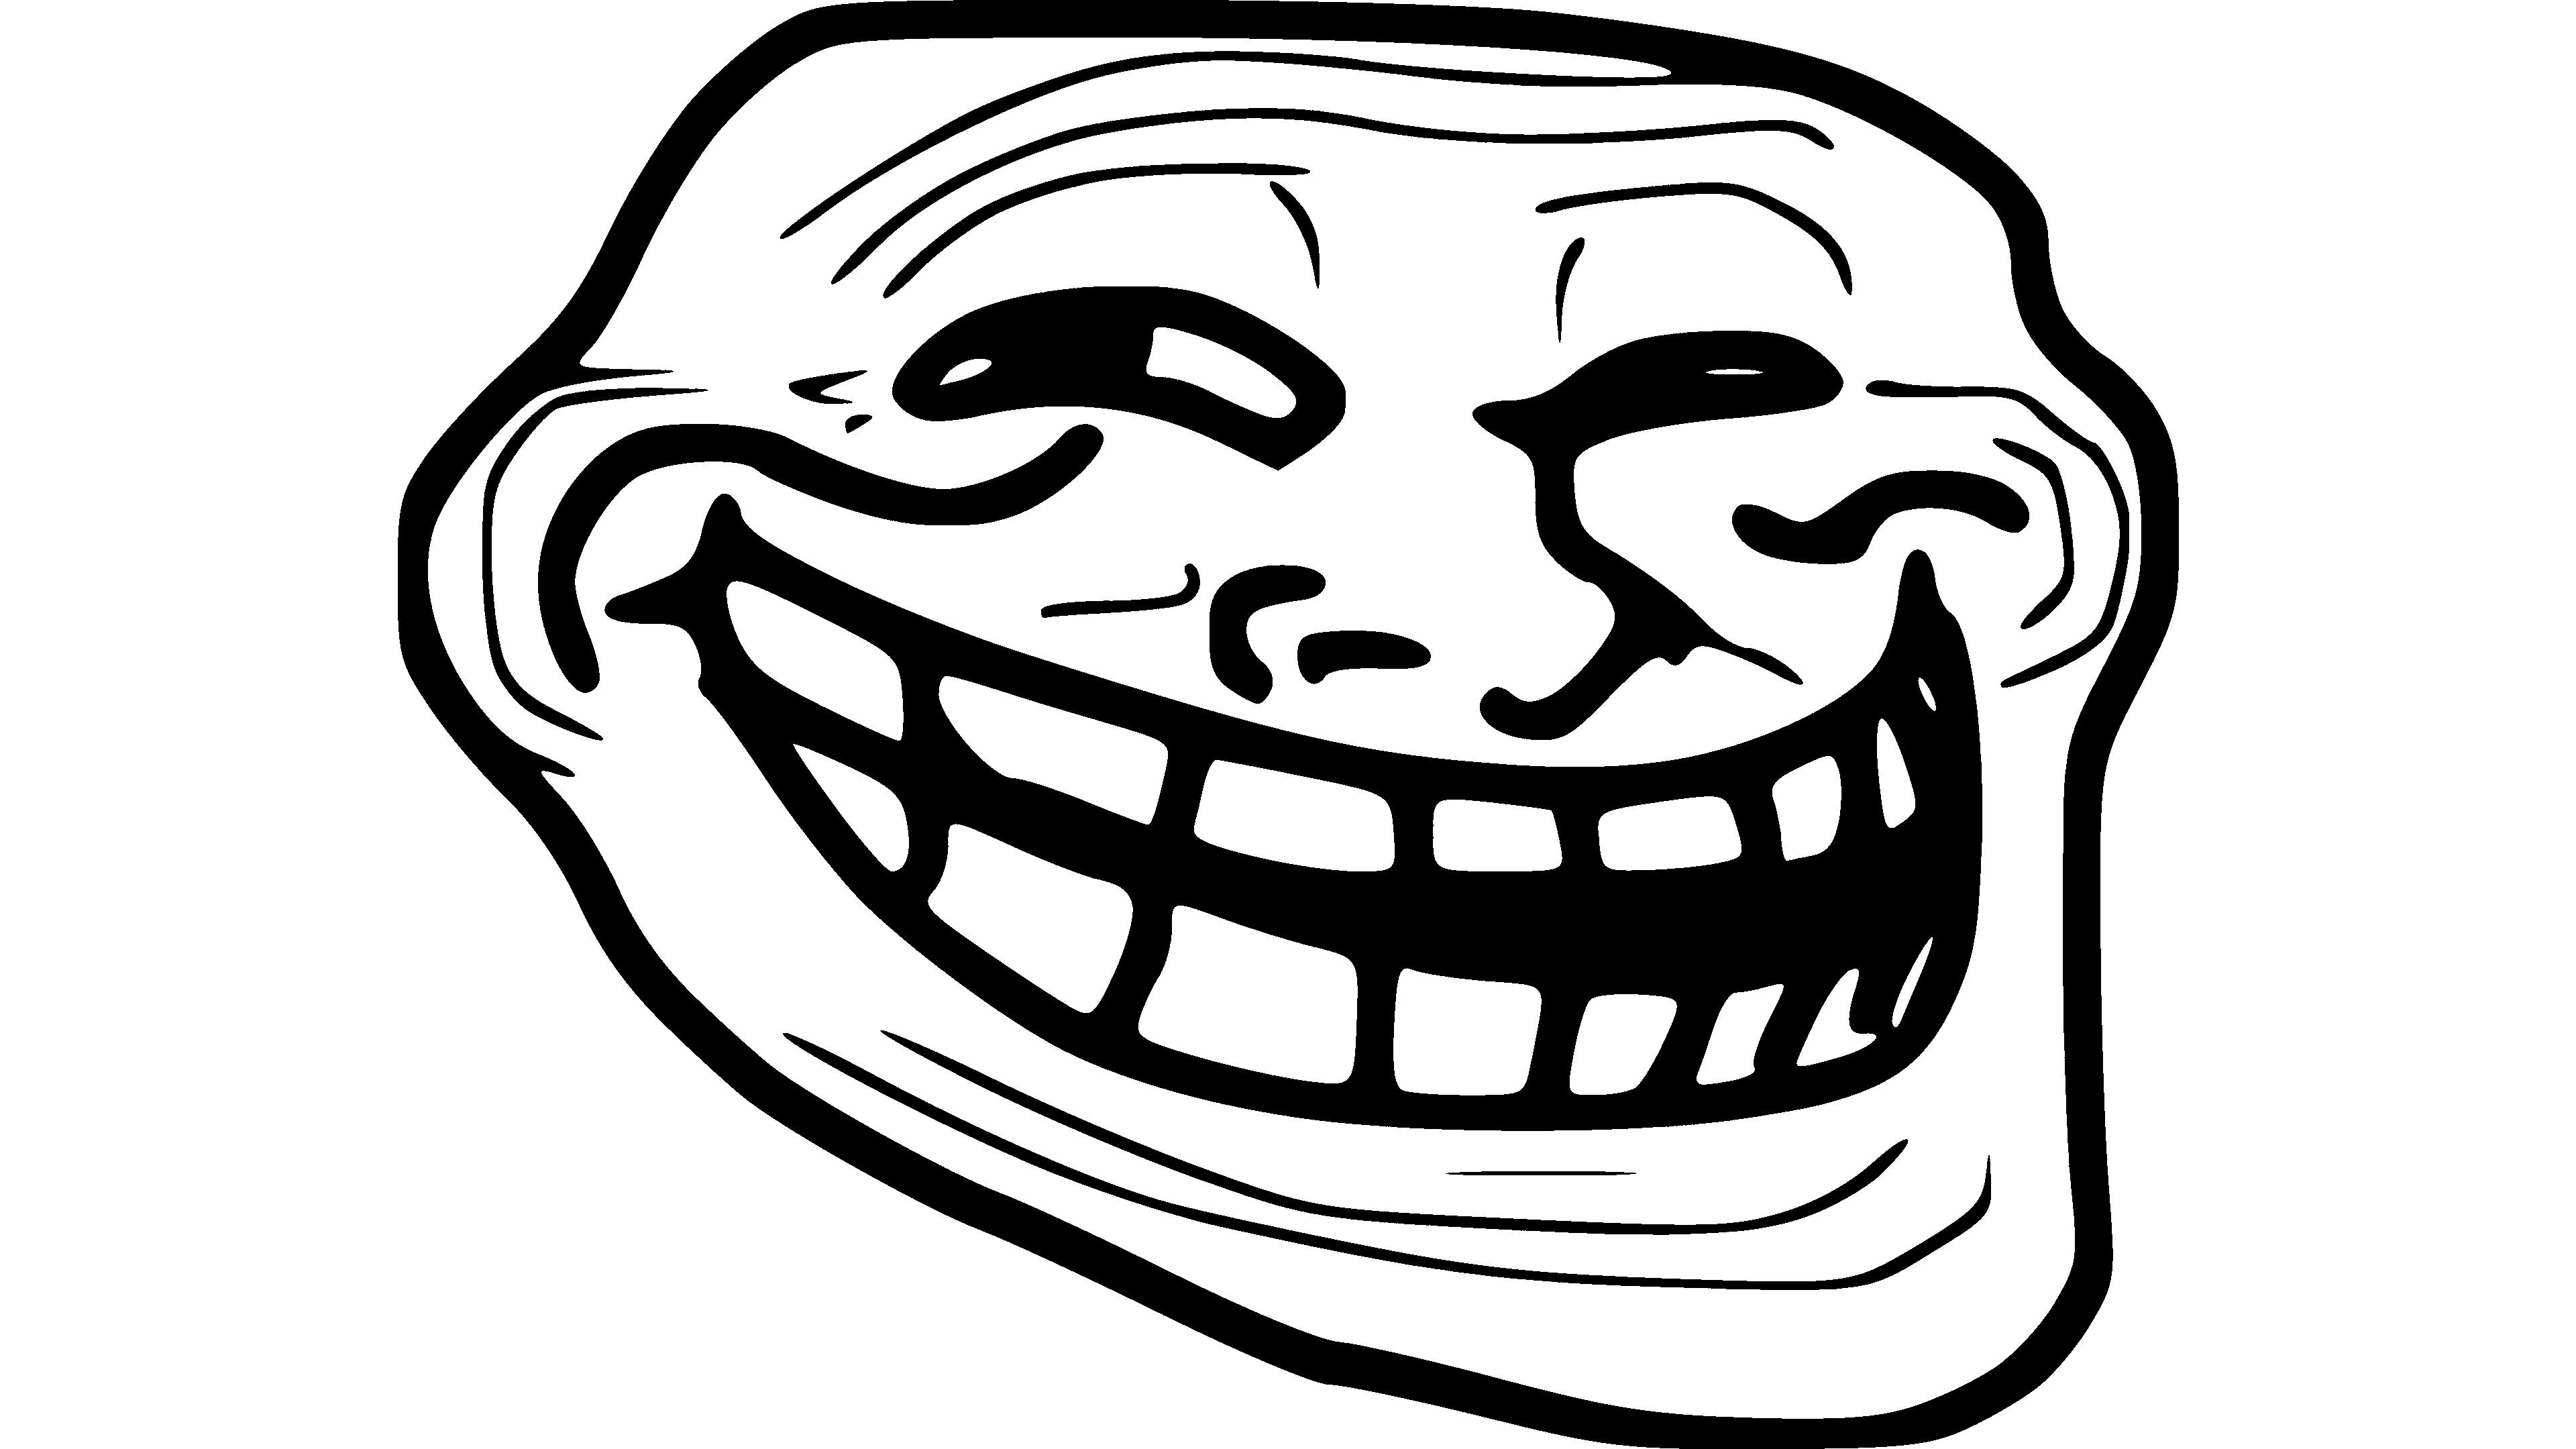

In [173]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [174]:
my_img = Image.open(os.path.join("black_and_white_example.jpg"))
type(my_img)

PIL.JpegImagePlugin.JpegImageFile

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [175]:
my_img_np = np.array(my_img) # Definimos el arreglo para la imagen
print(my_img_np.shape)
my_img_np

(2160, 3840)


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
 - 1: Si el valor del pixel es mayor  al _umbral_.
 - 0: Si el valor del pixel es menor o igual al _umbral_.
 - El `dtype` debe ser `np.uint8`.
 - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [176]:
umbral = 20
my_img_np_aux = my_img_np
my_img_np_aux[my_img_np_aux <= umbral] = 0                       # Aplicamos los filtros de 
my_img_np_aux[my_img_np_aux > umbral] = 1                        # acuerdo al umbral aplicado
my_img_np_aux.astype(np.uint8)
my_img_np_aux

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

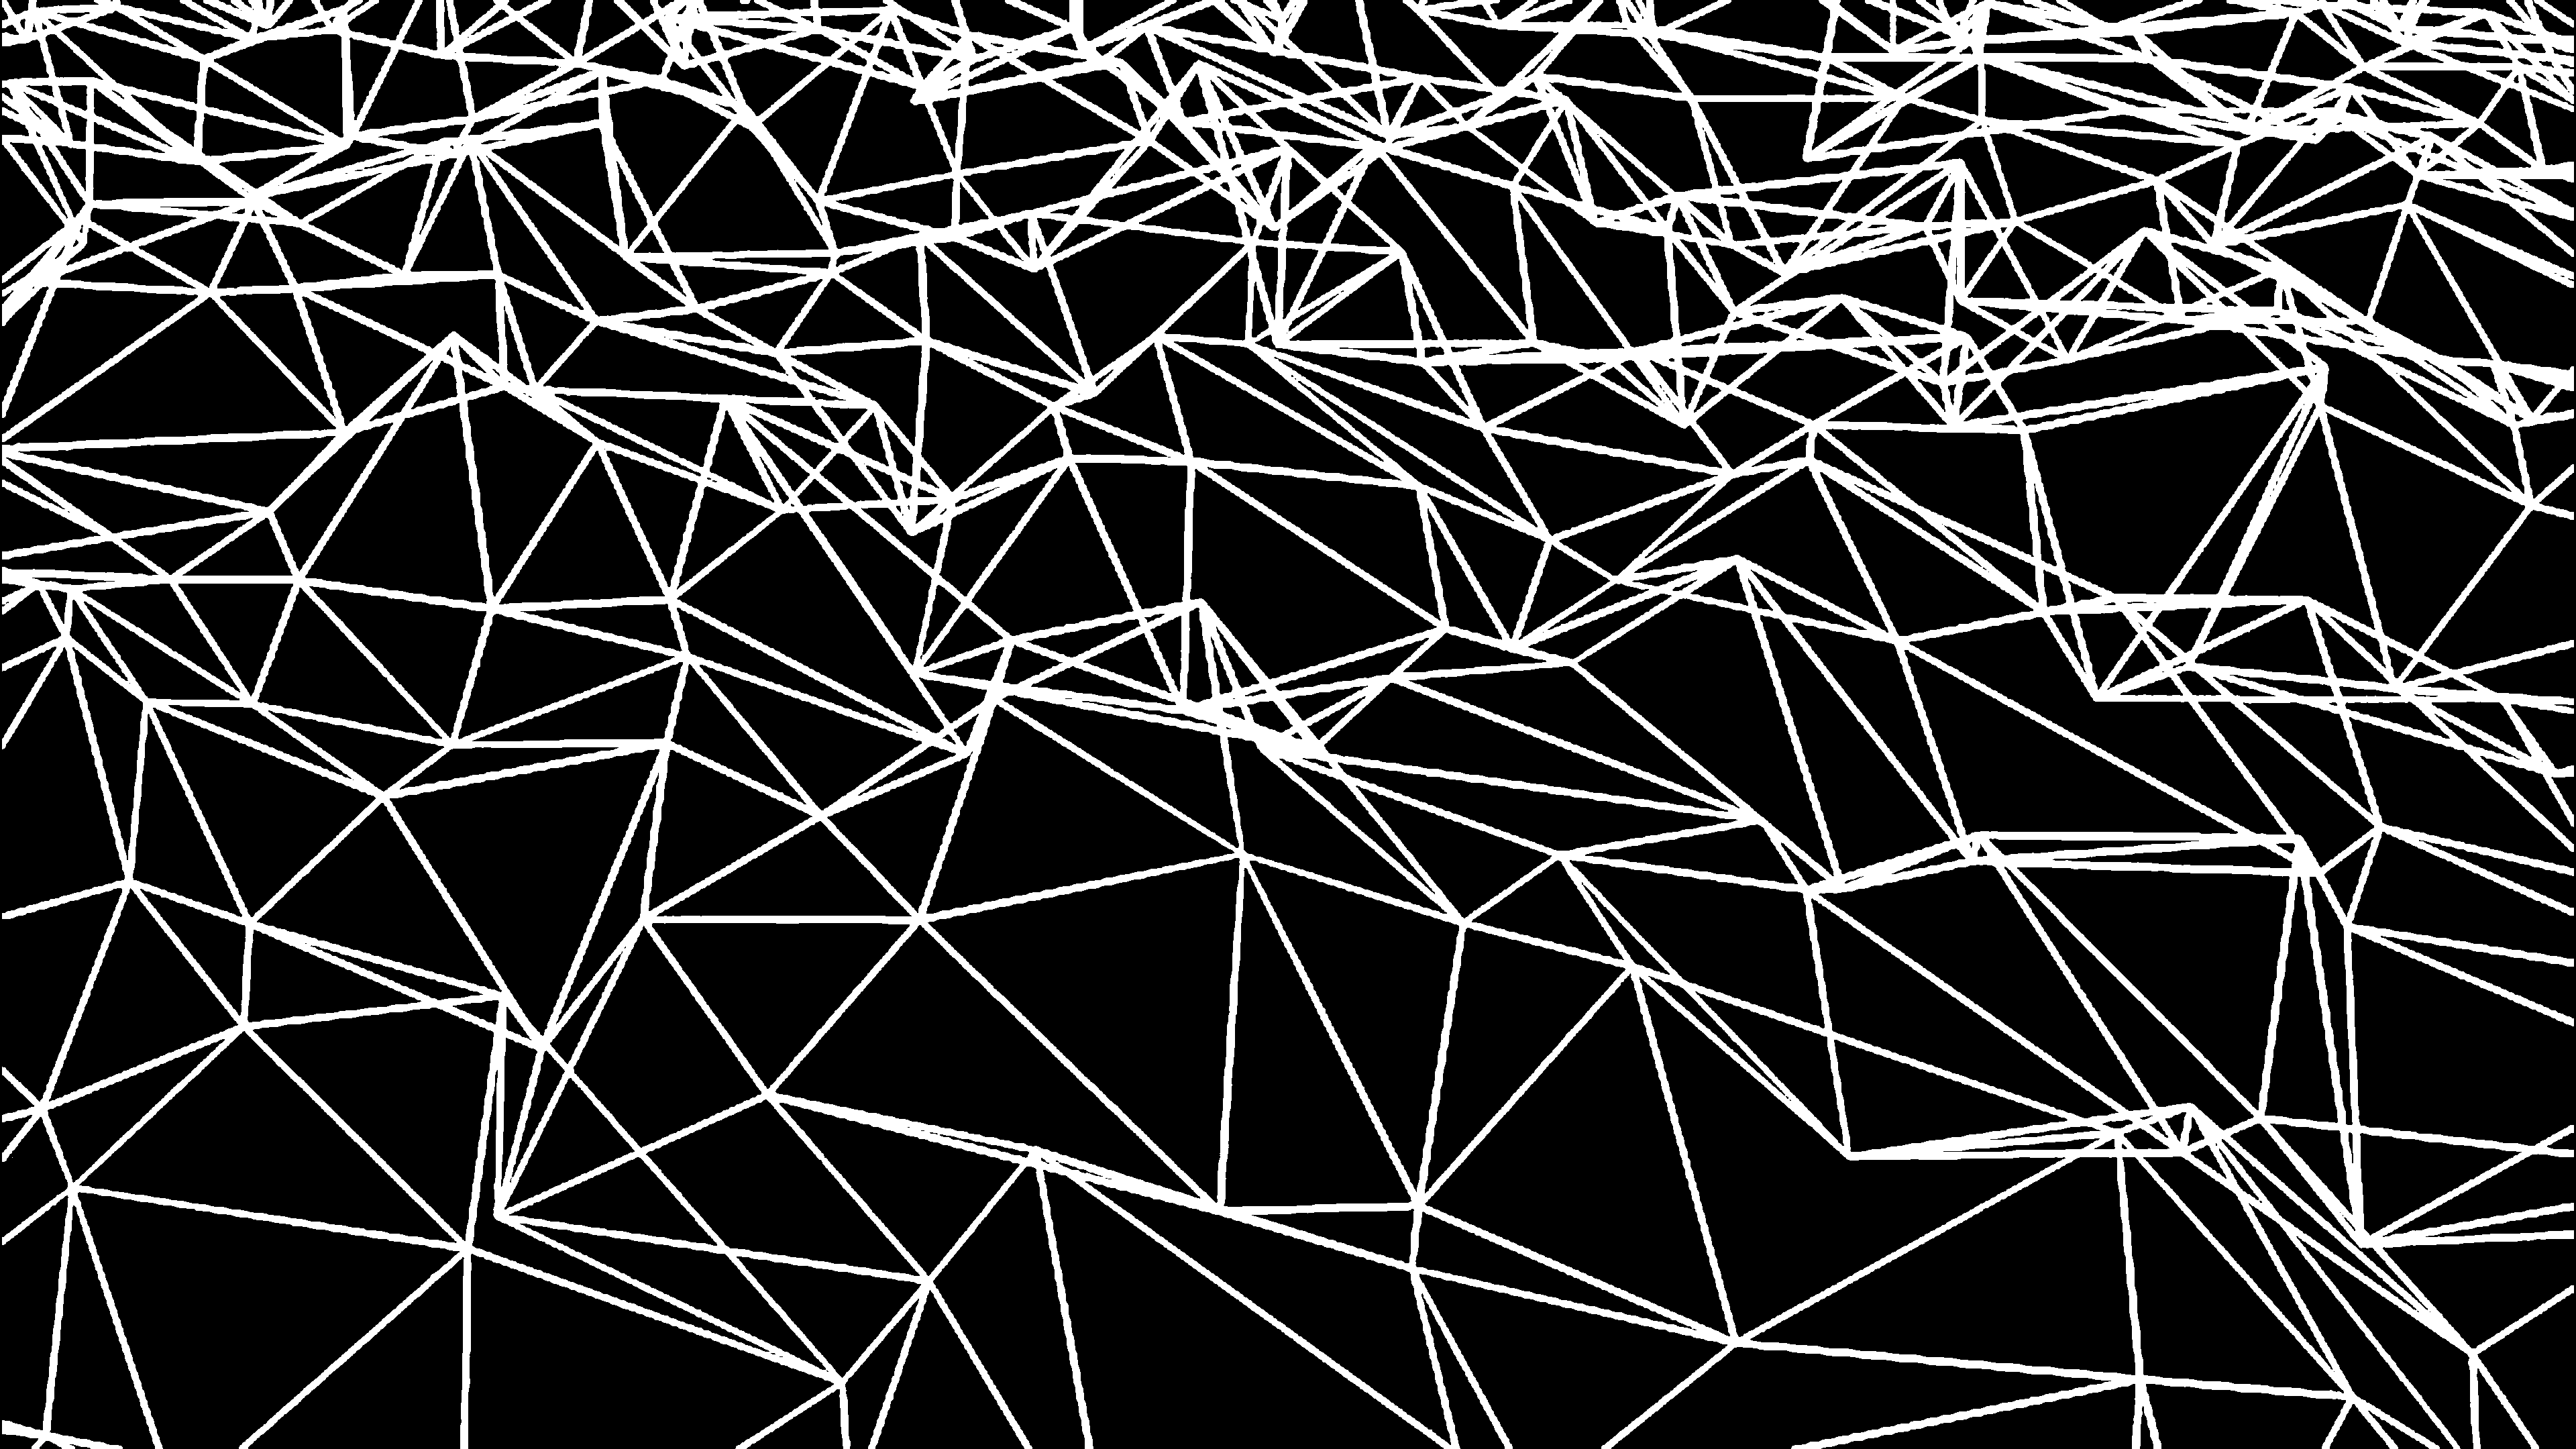

In [177]:
Image.fromarray(my_img_np_aux*255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [178]:
my_img_split = [] # Creamos la lista

for array in np.hsplit(my_img_np_aux, 3): # Separamos el arreglo en 3 arreglos de 2160x1280
  my_img_split.append(array) # Agregamos cada uno a la lista

Revisa utilizando la siguiente iteración.

In [179]:
for img_array in my_img_split: # Revisamos
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [180]:
cat = Image.open(os.path.join("gatito_original.png")) # Cargamos la imagen
cat_np = np.array(cat) # Lo pasamos a un array
print(cat_np.shape) 

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [181]:
cat_np[cat_np%2 != 0] = cat_np[cat_np%2 != 0] + 1 # A cada valor impar se le suma 1, volviéndose par

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [182]:
for i in range(0,cat_np.shape[2]): # Iteramos por cada canal
    cat_np[:,:,i] = cat_np[:,:,i] + my_img_split[i]  

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [183]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save("my_secret.png")
cat_secret_im # Notemos que esta es la "imagen falsa" donde tenemos 
              # nuestra verdadera imagen escondida

Output hidden; open in https://colab.research.google.com to view.

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [184]:
def imagenception(filepath):
    lure = Image.open(os.path.join(filepath))
    lure_np = np.array(lure)

    secret_list = [] # Creamos la lista "secret_list"

    for i in range(0,lure_np.shape[2]):
      secret_aux = lure_np[:, :, i] # Se itera por cada capa (que es una matriz de 2160x1280)
      secret_aux[secret_aux%2==0] = 0*255 # Convertimos los pares en 0 y los multiplicamos por 255
      secret_aux[secret_aux%2!=0] = 1*255 # Convertimos los impares en 1 y los multiplicamos por 255
      secret_aux.astype(np.uint8) # cambiamos el dtype a np.uint8
      secret_list.append(secret_aux)

    secret_np = np.array(np.c_[secret_list[0], secret_list[1], secret_list[2]])
 
    secret_img = Image.fromarray(secret_np, mode="L")

    return secret_img

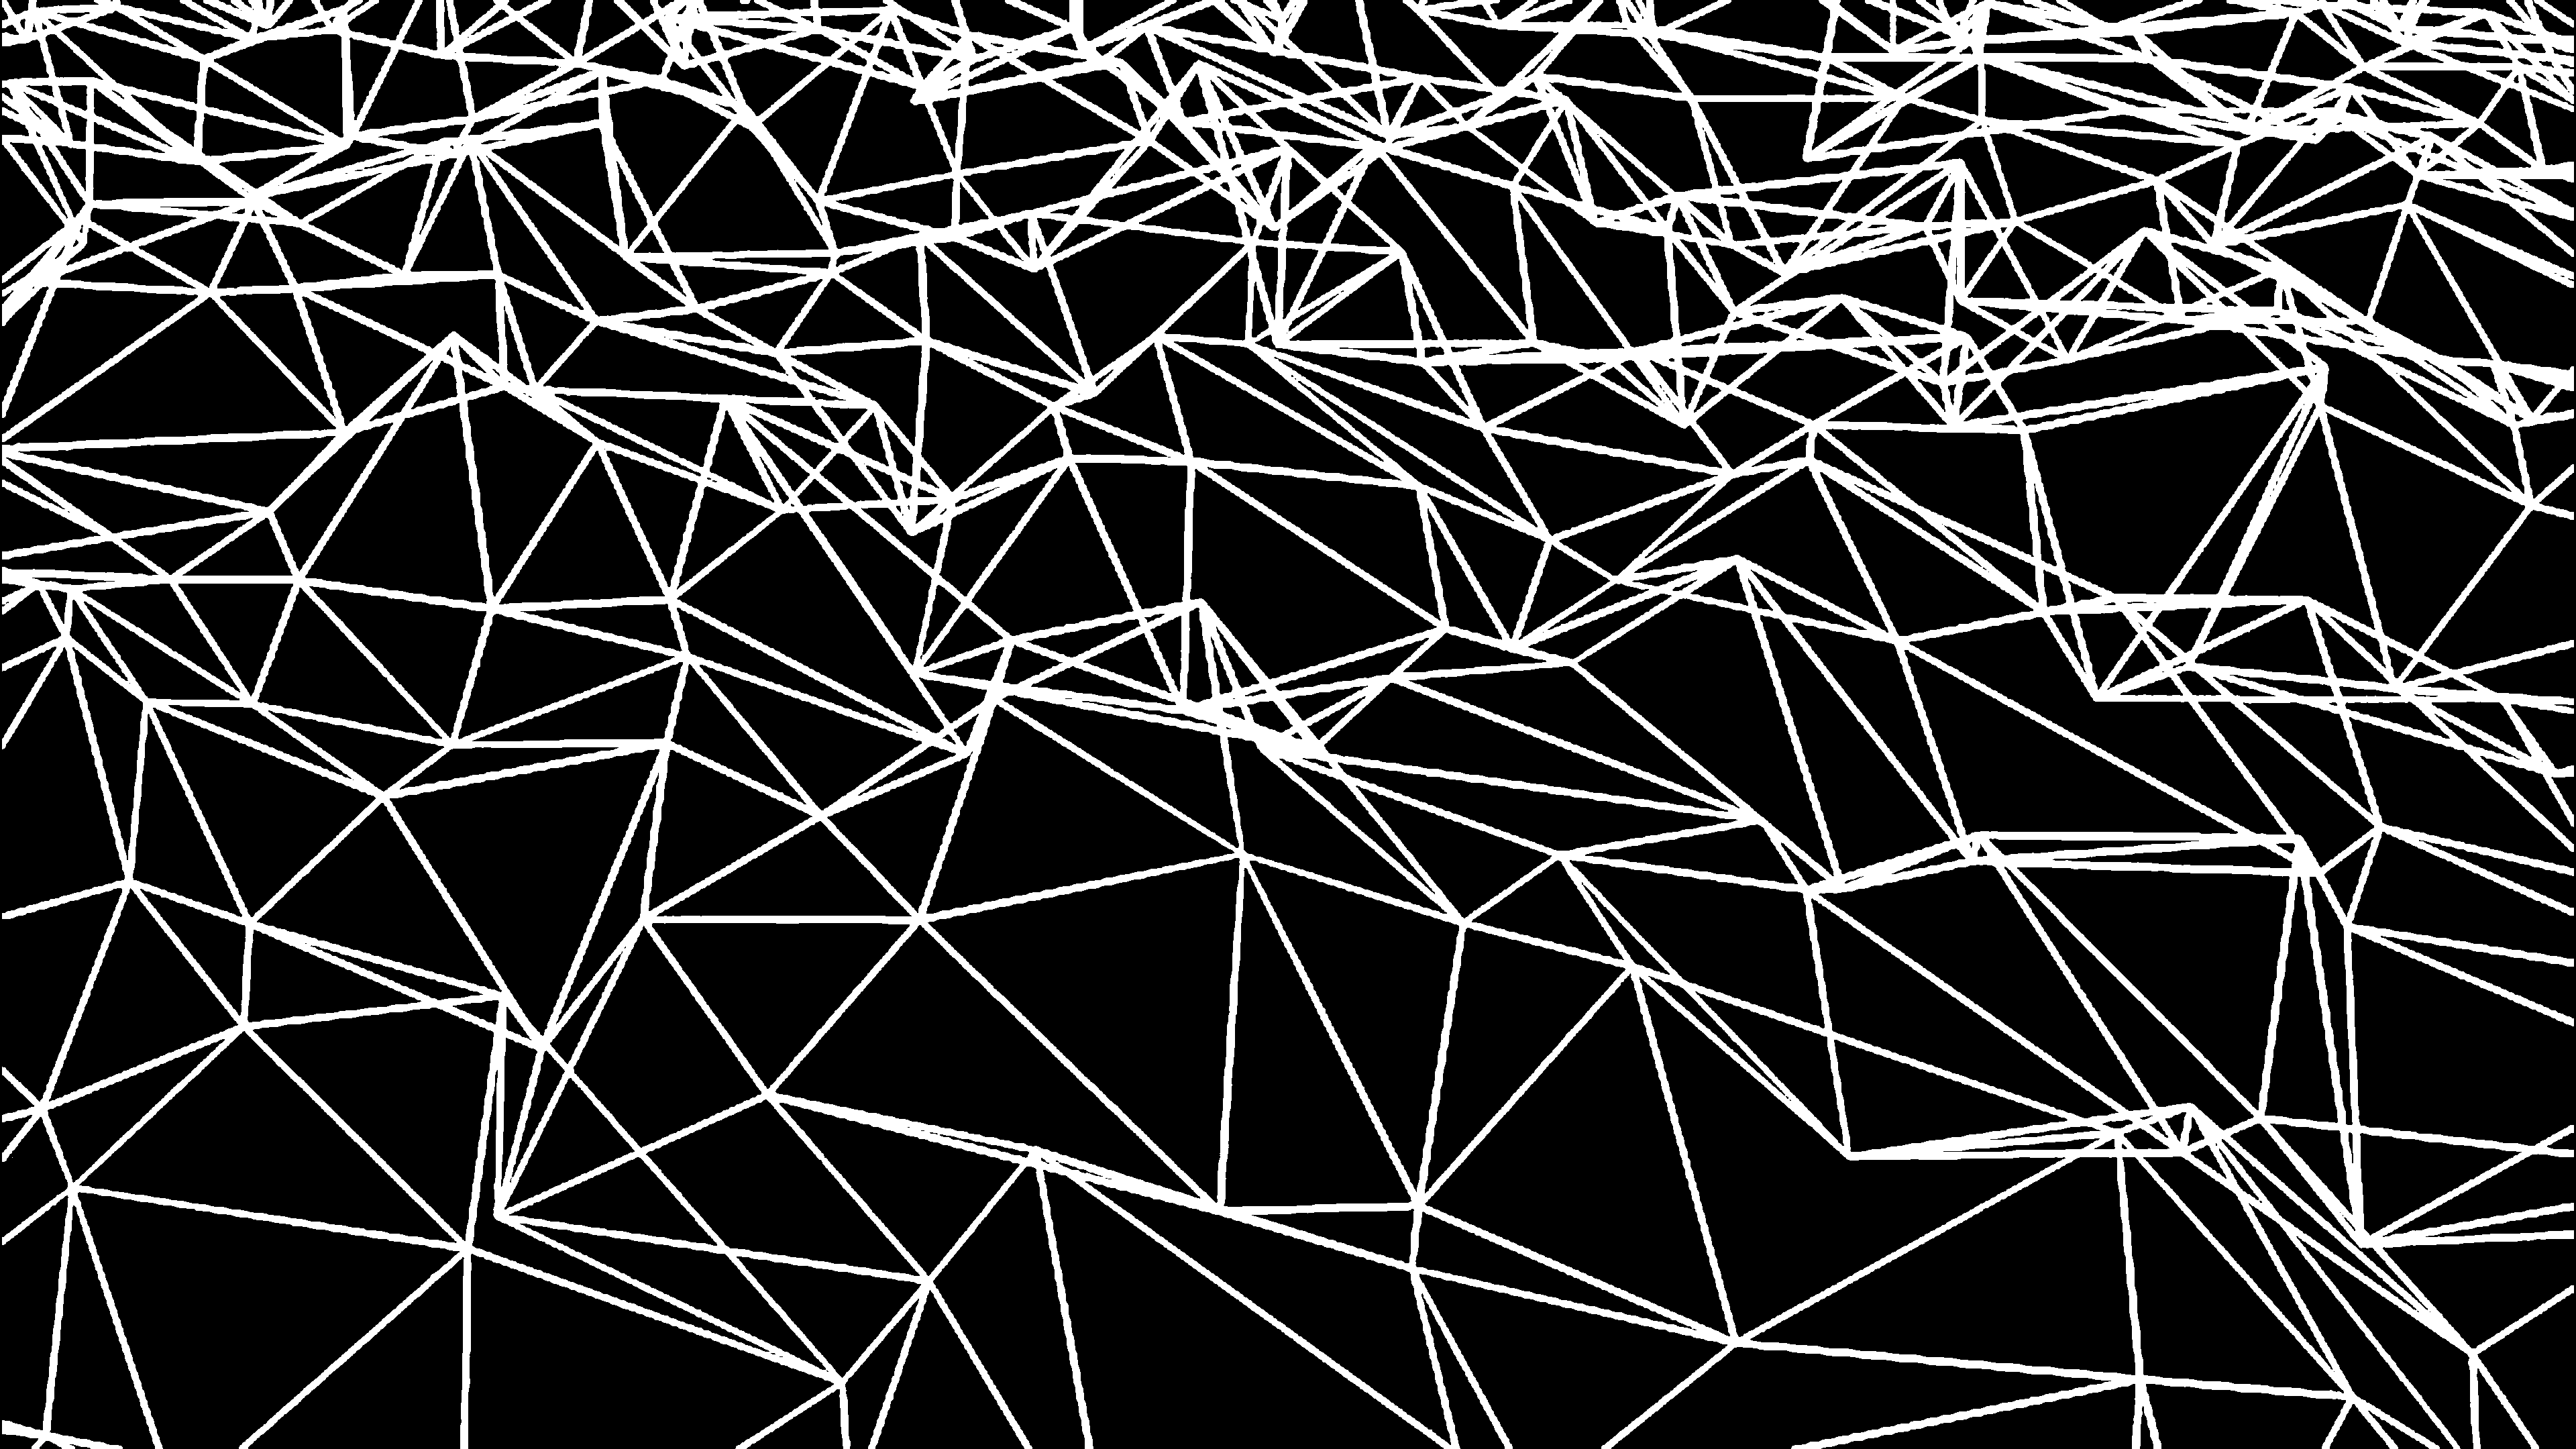

In [185]:
my_secret_img = imagenception(os.path.join("my_secret.png")) # Ingresamos de "image" la imagen "my_secret.png" que nos oculta la imagen real
my_secret_img # La función nos retorna la verdadera imagen

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [186]:
# libraries

import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [187]:
# Comprehension dictionary

df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [188]:
df_dict[2016].head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Una pequeña descripción de las columnas

* `Country` : Name of the country.
* `Region` : Region the country belongs to.
* `Happiness Rank` : Rank of the country based on the Happiness Score.
* `Happiness Score` : A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` : The standard error of the happiness score.
* `Economy (GDP per Capita)` : The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` : The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` : The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` : The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` : The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` : The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` : The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [189]:
from functools import reduce

intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

['Country', 'Family', 'Freedom', 'Generosity', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  <Las operaciones usadas fueron:
- reduce: Aplica recursivamente una función, especificada en la primera componente sobre un iterable especificado en la segunda componente. En este caso, cada iteración corresponde a una lista que representa las columnas del dataframe de dicha iteración.
- intersect1d: Encuentra la intersección de dos matrices(o listas) y devuelve los valores únicos ordenados que están en ambas matrices de entrada. En este caso, recibe de entrada las dos primeras listas que representan las columnas de cada dataframe y retorna la intersección y luego esta misma se vuelve a evaluar junto con la que sigue en el iterable recursivamente hasta llegar al final.
- tolist: Transforma el arreglo 1D a lista

Por último, cabe mencionar que la sintaxis df_i.columns.values **for** df_i **in** df_dict.values() "convierte" a cada dataframe iterado en su correspondiente lista de columnas.>

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [190]:
happiness = pd.concat(df_dict, names = ["Year", "drop_me"], sort = False).droplevel("drop_me").reset_index() # Creamos happiness de acuerdo a lo que nos piden
happiness = happiness[intersection_columns] # Restringimos las columnas a "intersection_columns"
happiness.columns = (happiness.columns.str.lower().str.replace(" ", "_").str.replace(')', "").str.replace("(", "")) # Se reemplazan espacios por guiones bajos y 
happiness                                                                                               # se eliminan los paréntesis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,family,freedom,generosity,year
0,Switzerland,1.349510,0.665570,0.296780,2015
1,Iceland,1.402230,0.628770,0.436300,2015
2,Denmark,1.360580,0.649380,0.341390,2015
3,Norway,1.330950,0.669730,0.346990,2015
4,Canada,1.322610,0.632970,0.458110,2015
...,...,...,...,...,...
465,Rwanda,0.945707,0.581844,0.252756,2017
466,Syria,0.396103,0.081539,0.493664,2017
467,Tanzania,1.041990,0.390018,0.354256,2017
468,Burundi,0.629794,0.059901,0.204435,2017


### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [191]:
happiness.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,470,166,Switzerland,3,,,,,,,
family,470.0,,,,0.990347,0.318707,0.0,0.793,1.025665,1.228745,1.610574
freedom,470.0,,,,0.402828,0.150356,0.0,0.297615,0.418347,0.51685,0.66973
generosity,470.0,,,,0.242241,0.131543,0.0,0.152831,0.22314,0.315824,0.838075
year,470.0,,,,2015.993617,0.816907,2015.0,2015.0,2016.0,2017.0,2017.0


¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [192]:
# INTERPRETACIÓN: El problema es ver que paises no tienen mediciones para al menos uno de los 3 años.

paises_sinmedir = [] # Creamos una lista donde se guardan los países sin medir
  
for pais in happiness["country"].unique(): # Se iteran los países sin repetición
  df_aux = happiness[happiness["country"] == pais]
  if df_aux["year"].unique().shape[0] < 3: # Se verifica si el pais no tiene los tres años de medida
    paises_sinmedir.append(pais) # En caso afirmativo se agrega a la lista  

aux = paises_sinmedir

print("Según lo expuesto por los datos, la cantidad de países que no tiene medida de felicidad para al menos uno de los 3 años de estudio son ",len(paises_sinmedir))

Según lo expuesto por los datos, la cantidad de países que no tiene medida de felicidad para al menos uno de los 3 años de estudio son  20


In [193]:
print("Y estos son: ")
print("")
paises_sinmedir

Y estos son: 



['Oman',
 'Taiwan',
 'Suriname',
 'Hong Kong',
 'Somaliland region',
 'Mozambique',
 'Lesotho',
 'Laos',
 'Swaziland',
 'Djibouti',
 'Comoros',
 'Central African Republic',
 'Puerto Rico',
 'Belize',
 'Somalia',
 'Somaliland Region',
 'Namibia',
 'South Sudan',
 'Taiwan Province of China',
 'Hong Kong S.A.R., China']

__Respuesta:__  <De los países expuestos arriba, tres de ellos están repetidos (álgunos más de una vez), por ende será necesario una modificación del dataframe happiness>

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [194]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", "Taiwan Province of China": "Taiwan", "Somaliland region": "Somaliland Region", "Somalia": "Somaliland Region"}
for pais in bad_country_names_dict:
  happiness["country"].replace(pais, bad_country_names_dict[pais], inplace=True) # Con replace, arreglamos los errores de nombres


Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [195]:
# INTERPRETACIÓN: El problema es ver que paises no tienen mediciones para al menos uno de los 3 años.

paises_sinmedir = [] # Creamos una lista donde se guardan los países sin medir
  
for pais in happiness["country"].unique(): # Se iteran los países sin repetición
  df_aux = happiness[happiness["country"] == pais]
  if df_aux["year"].unique().shape[0] < 3: # Se verifica si el pais no tiene los tres años de medida
    paises_sinmedir.append(pais) # En caso afirmativo se agrega a la lista  

aux = paises_sinmedir

print("la cantidad de países que no tiene medida de felicidad para al menos uno de los 3 años de estudio son ",len(paises_sinmedir))

la cantidad de países que no tiene medida de felicidad para al menos uno de los 3 años de estudio son  13


__Respuesta:__  < Una vez corregido, notamos que Taiwan, Somalia y Hong Kong ahora pertenecen a los paises que si se han medido en los 3 años, puesto que sus distintos nombres ya no son "considerados" por el dataframe como paises separados, lo cual implica (para cada uno) que aportan el año faltante al "unirse" en un solo pais. Por ejemplo Taiwan y Taiwan Province of China ahora se consideran como uno solo, llamado Taiwan.

Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [196]:
df_dict[2017].rename(columns={"Happiness.Score":"Happiness Score"}, inplace=True)                                      # Cambiamos el nombre de la columna Happines.Score en la tabla del 2017
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]  # pues de este modo podemos incluirla en un nuevo dataframe

happiness_conhs = pd.concat(df_dict, names = ["Year", "drop_me"], sort = False).droplevel("drop_me").reset_index() # Creamos el mismo dataframe happiness pero que ahora incluye 
                                                                                                                   # la columna  happiness score aplicando la misma concatenación de antes
happiness_conhs = happiness_conhs[intersection_columns] 
happiness_conhs.columns = (happiness_conhs.columns.str.lower().str.replace(" ", "_").str.replace(')', "").str.replace("(", "")) 

for pais in bad_country_names_dict:
  happiness_conhs["country"].replace(pais, bad_country_names_dict[pais], inplace=True) # Como antes, unimos los paises que se repiten con nombre distinto

happiness_conhs_pivot = happiness_conhs.pivot_table(index="year", columns="country", values="happiness_score", fill_value='')
happiness_conhs_pivot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Croatia,Cyprus,Czech Republic,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Cyprus,Norway,Oman,Pakistan,Palestinian Territories,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somaliland Region,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,3.575,4.959,5.605,4.033,6.574,4.350,7.284,7.200,5.212,5.960,4.694,5.813,6.937,,3.340,5.253,5.890,4.949,4.332,6.983,4.218,3.587,2.905,3.819,4.252,7.427,3.678,3.667,6.670,5.140,6.477,3.956,3.989,4.517,7.226,5.759,5.689,6.505,7.527,4.369,4.885,5.975,4.194,6.130,5.429,4.512,7.406,6.575,3.896,4.297,6.750,4.633,4.857,6.123,3.656,4.518,4.788,5.474,4.800,7.561,4.565,5.399,4.686,4.677,6.940,7.278,5.948,3.655,5.709,5.987,5.192,5.855,4.419,5.589,6.295,5.286,4.876,5.098,4.839,4.898,4.571,5.754,5.833,6.946,5.007,3.681,4.292,5.770,3.995,6.302,4.436,5.477,7.187,5.889,4.874,5.192,5.013,4.971,4.307,,4.514,7.378,7.286,5.828,3.845,5.268,5.695,7.522,6.853,5.194,4.715,6.786,5.878,5.824,5.073,5.791,5.102,,6.611,5.124,5.716,3.465,6.411,3.904,5.123,4.507,6.798,5.995,5.848,5.0570,4.642,5.984,,6.329,4.271,4.550,6.269,4.867,7.364,7.587,3.006,6.298,4.786,3.781,6.455,2.839,6.168,4.739,5.332,5.548,3.931,4.681,6.901,6.867,7.119,6.485,6.003,6.810,5.360,4.077,5.129,4.610
2016,3.360,4.655,6.355,3.866,6.650,4.360,7.313,7.119,5.291,6.218,4.643,5.802,6.929,5.956,3.484,5.196,5.822,5.163,3.974,6.952,4.217,3.739,2.905,3.907,4.513,7.404,,3.763,6.705,5.245,6.481,3.956,4.236,4.272,7.087,5.488,5.546,6.596,7.526,,5.155,5.976,4.362,6.068,5.517,4.508,7.413,6.478,4.121,4.252,6.994,4.276,5.033,6.324,3.607,4.028,4.871,5.458,5.145,7.501,4.404,5.314,4.813,4.575,6.907,7.267,5.977,3.916,5.510,5.921,5.303,5.919,4.356,5.401,6.239,5.185,4.876,5.560,5.129,,3.622,5.615,5.813,6.871,5.121,3.695,4.156,6.005,4.073,6.488,4.201,5.648,6.778,5.897,4.907,5.161,5.151,,4.395,4.574,4.793,7.339,7.334,5.992,3.856,4.875,5.771,7.498,,5.132,4.754,6.701,5.538,5.743,5.279,5.835,5.123,7.039,6.375,5.528,5.856,3.515,6.379,4.219,5.177,4.635,6.739,6.078,5.768,5.2485,4.459,5.835,3.832,6.361,4.415,4.139,6.269,,7.291,7.509,3.069,6.379,4.996,3.666,6.474,3.303,6.168,5.045,5.389,5.658,3.739,4.324,6.573,6.725,7.104,6.545,5.987,6.084,5.061,3.724,4.795,4.193
2017,3.794,4.644,5.872,3.795,6.599,4.376,7.284,7.006,5.234,6.087,4.608,5.569,6.891,5.956,3.657,5.011,5.823,5.182,3.766,6.635,4.714,4.032,2.905,4.168,4.695,7.316,2.693,3.936,6.652,5.273,6.357,,4.291,4.280,7.079,5.293,5.621,6.609,7.522,,5.230,6.008,4.735,6.003,5.611,4.460,7.469,6.442,4.465,4.286,6.951,4.120,5.227,6.454,3.507,3.603,5.181,5.472,5.324,7.504,4.315,5.262,4.692,4.497,6.977,7.213,5.964,4.180,5.311,5.920,5.336,5.819,4

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  <
- La información que se podría sacar rápidamente de esto sería el ranking de cada pais por el año, el promedio del ranking de algún país en los 3 años, el promedio de los rankings de todos los paises en algún año, etc..
- Su utilidad irá dependiendo de lo que busquemos hacer con los datos, pues sirve si queremos comparar los valores que se obtienen para algún registro en particular, o utilizar algunas herramientas de visualización básica que requieren este formato>

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?


In [197]:
df_dict[2017].rename(columns={"Happiness.Rank":"Happiness Rank"}, inplace=True)                                      # Cambiamos el nombre de la columna Happines.Rank en la tabla del 2017
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]  # pues de este modo podemos incluirla en un nuevo dataframe

happiness_cons = pd.concat(df_dict, names = ["Year", "drop_me"], sort = False).droplevel("drop_me").reset_index() # Creamos el mismo dataframe con el happines score que ahora incluye 
                                                                                                                   # la columna happiness rank aplicando nuevamente la misma concatenación de antes
happiness_cons = happiness_cons[intersection_columns] 
happiness_cons.columns = (happiness_cons.columns.str.lower().str.replace(" ", "_").str.replace(')', "").str.replace("(", "")) 

for pais in bad_country_names_dict:
  happiness_cons["country"].replace(pais, bad_country_names_dict[pais], inplace=True) # Nuevamente como antes unimos los paises que se repiten con nombre distinto


happiness_cons_pivot = happiness_cons.pivot_table(index="year", columns="country", values="happiness_rank", fill_value='')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [198]:
df_aux = happiness_cons.pivot_table(index="year", columns="country", values="happiness_rank") # Creamos un dataframe auxiliar donde guardamos el happiness_cons pivoteado con valores de happiness rank
top_3paises = [] # En esta lista incluiremos el top de paises

for i in range(0,3):
  c=float('inf')
  for pais in df_aux:
    if df_aux[pais].mean() < c:
      c = df_aux[pais].mean()
      pais_elegido = pais  
  top_3paises.append(pais_elegido)
  df_aux = df_aux.drop(columns = pais_elegido)

top_3paises

['Denmark', 'Switzerland', 'Iceland']

__Respuesta:__  <Como podemos ver, los 3 países con mayor ranking de felicidad son en promedio Dinamarca, Suiza e Islandia en orden descendente>

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [199]:
df_aux = happiness_cons.pivot_table(index="year", columns="country", values="happiness_score") # Creamos un dataframe auxiliar donde guardamos el happiness_cons pivoteado pero con valores de happiness score
top_3paises = []

for i in range(0,3):
  c=0.0
  for pais in df_aux:
    if df_aux[pais].mean() > c:
      c = df_aux[pais].mean()
      pais_elegido = pais  
  top_3paises.append(pais_elegido)
  df_aux = df_aux.drop(columns = pais_elegido)

top_3paises

['Switzerland', 'Denmark', 'Iceland']

__Respuesta:__  <Los 3 países con mayor score de felicidad en promedio son Suiza, Dinamarca e Islandia en orden descendente. Como podemos apreciar, son los mismos 3 mejores en ranking que vimos antes, salvo que ahora Suiza lidera el top 3>

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [200]:
# Primero preparamos los datos para juntar todos los factores en comun de los tres años exceptuando happiness_score y happiness_rank
df_dict[2015].rename(columns={}, inplace=True)   
df_dict[2017].rename(columns={"Happiness Rank" : "Happiness.Rank", "Happiness Score" : "Happiness.Score", "Economy..GDP.per.Capita." : "Economy (GDP per Capita)", "Health..Life.Expectancy." : "Health (Life Expectancy)", "Trust..Government.Corruption." : "Trust (Government Corruption)", "Dystopia.Residual" : "Dystopia Residual"}, inplace=True)
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]  

# Ahora creamos el happiness final
happiness_final = pd.concat(df_dict, names = ["Year", "drop_me"], sort = False).droplevel("drop_me").reset_index() # Este es el dataframe final de happiness que tiene todos los factores en común excepto el score y el rank  
happiness_final = happiness_final[intersection_columns] 
happiness_final.columns = (happiness_final.columns.str.lower().str.replace(" ", "_").str.replace(')', "").str.replace("(", "")) 

for pais in bad_country_names_dict:
  happiness_final["country"].replace(pais, bad_country_names_dict[pais], inplace=True) # Y ya por última vez, unimos los paises que se repiten con nombre distinto

# Ahora definimos el hap_mean_factors
hap_mean_factors = happiness_final.pivot_table(index="year", aggfunc=np.mean)
hap_mean_factors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,health_life_expectancy,trust_government_corruption
year,,,,,,,
2015,2.098977,0.846137,0.991046,0.428615,0.237296,0.630259,0.143422
2016,2.325807,0.953880,0.793621,0.370994,0.242635,0.557619,0.137624
2017,1.850238,0.984718,1.188898,0.408786,0.246883,0.551341,0.123120


Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [201]:
l=[] # Esta lista contendrá, para cada año, la suma de todos los promedios de los factores.

for i in hap_mean_factors.sum(axis=1):
  l.append(i)

j = 0
df_aux = pd.DataFrame()

for c in hap_mean_factors.transpose():    # Transponemos el dataframe para incorporar sus datos a df_aux en formato porcentual.
  df_aux[c] = hap_mean_factors.transpose()[int(c)]*(100/l[j]) 
  j = j+1

per_contribution_factors = df_aux.transpose()
per_contribution_factors.rename(columns = {"dystopia_residual" : "dystopia_residual %", "economy_gdp_per_capita" : "economy_gdp_per_capita %",  # Modificamos los nombres de las columnas para denotar que son porcentajes
"family" : "family %",	"freedom" : "freedom %", "generosity" : "generosity %", "health_life_expectancy" : "health_life_expectancy %", "trust_government_corruption" : "trust_government_corruption %"}, inplace=True)
per_contribution_factors # Para cada año, vemos en porcentaje la contribución de cada factor 

,dystopia_residual %,economy_gdp_per_capita %,family %,freedom %,generosity %,health_life_expectancy %,trust_government_corruption %
2015,39.045271,15.739887,18.435486,7.973117,4.414183,11.724116,2.667940
2016,43.213103,17.722930,14.745349,6.893005,4.508117,10.360469,2.557027
2017,34.558148,18.392251,22.205851,7.635173,4.611210,10.297766,2.299600


__Resuesta:__
* 2015:  < El que más aporta es la Distopía Residual con un 39%>
* 2016:  < El que más aporta es la Distopía Residual con un 43%>
* 2017:  < El que más aporta es la Distopía Residual con un 34%>

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [202]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [203]:
suicide.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,,,,,,,
year,27820.0,,,,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,,,,,,,
age,27820,6,15-24 years,4642,,,,,,,
suicides_no,27820.0,,,,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,,,,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides/100k pop,27820.0,,,,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Albania1987,12,,,,,,,
HDI for year,8364.0,,,,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"2,156,624,900",12,,,,,,,


Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [204]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (suicide.groupby(["country", "year"]).agg({"population":[sum], "suicides_no":[sum]}).reset_index().assign(suicides_ratio_100k = (suicide["suicides_no"]/suicide["population"])*100, 
            suicides_rank = (((suicide["suicides_no"]/suicide["population"])*100).rank().max()/(suicide["suicides_no"]/suicide["population"])*100).rank()
    )
)

suicides_agg

,country,year,population,suicides_no,suicides_ratio_100k,suicides_rank
,,,sum,sum,,
0,Albania,1987,2709600,73,0.006711,13184.5
1,Albania,1988,2764300,63,0.005195,14705.5
2,Albania,1989,2803100,68,0.004833,15129.0
3,Albania,1992,2822500,47,0.004587,15401.5
4,Albania,1993,2807300,73,0.003281,17010.0
...,...,...,...,...,...,...
2316,Uzbekistan,2010,25651783,1464,0.001160,20262.0
2317,Uzbekistan,2011,25978049,1640,0.001131,20328.0
2318,Uzbekistan,2012,26381830,1835,0.001124,20341.5


Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [205]:
hap_sui = pd.merge(suicides_agg, happiness_cons, how="inner", on=["country", "year"]) # Concatenamos ambos dataframes con la función merge y de acuerdo a lo que nos piden
hap_sui

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  """Entry point for launching an IPython kernel.


,country,year,"(country, )","(year, )","(population, sum)","(suicides_no, sum)","(suicides_ratio_100k, )","(suicides_rank, )",family,freedom,generosity,happiness_rank,happiness_score
0,Argentina,2015,Argentina,2015,39699624,3073,0.002652,17819.0,1.24823,0.44974,0.11451,30,6.574
1,Armenia,2015,Armenia,2015,2795335,74,0.004751,15226.5,0.77711,0.19847,0.07855,127,4.350
2,Armenia,2016,Armenia,2016,2400033,67,0.001891,19001.0,0.62477,0.14037,0.07793,121,4.360
3,Australia,2015,Australia,2015,22240785,3027,0.003906,16227.0,1.30923,0.65124,0.43562,10,7.284
4,Austria,2015,Austria,2015,8219386,1251,0.000000,25680.0,1.29704,0.62433,0.33088,13,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Turkmenistan,2015,Turkmenistan,2015,4886514,133,0.001542,19565.0,1.22668,0.47610,0.16979,70,5.548
64,Ukraine,2015,Ukraine,2015,40345446,7574,0.000000,25680.0,1.20278,0.25123,0.15275,111,4.681
65,United Kingdom,2015,United Kingdom,2015,61082942,4910,0.000000,25680.0,1.28548,0.59625,0.51912,21,6.867
66,United States,2015,United States,2015,300078511,44189,0.000453,22107.0,1.24711,0.54604,0.40105,15,7.119


¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [206]:
corr = round(hap_sui[["happiness_rank",('suicides_rank', '')]].corr(), 100) # Calculamos la matriz de correlación
float(corr[["happiness_rank"]].min()) # Obtenemos de la matriz el dato de interés

/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


0.010737848627955456

__Respuesta:__  <La correlación entre estas variables es de 0.0107 aproximadamente y de acuerdo al rango al que pertenece su valor, podemos afirmar que es "nula">

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [207]:
# Mismo proceso anterior pero reestringiendonos a cada año
for año in [2015, 2016]:
  df_aux = hap_sui[hap_sui["year"]==año]
  corr = round(df_aux[["happiness_rank",('suicides_rank', '')]].corr(), 100)
  print("Correlación en el año "+str(año)+": "+str(float(corr[["happiness_rank"]].min())))

Correlación en el año 2015: -0.11083786321312152
Correlación en el año 2016: 0.497456904058045


__Respuesta:__  <Las correlaciones son:
- Para el año 2015: -0.110837..  y de acuerdo al rango en que está, decimos que es "pequeña"
- Para el año 2016: 0.497456..  y de acuerdo al rango en que está, decimos que es "mediana o moderada"> 

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [208]:
# Lo mismo de antes, pero reemplazando las variables
corr = round(hap_sui[["happiness_score",('suicides_ratio_100k', '')]].corr(), 100)
float(corr[["happiness_score"]].min())

0.07322461183905223

Esta en el rango de "nula"

In [209]:
# Lo mismo de antes, pero reemplazando las variables
for año in [2015, 2016]:
  df_aux = hap_sui[hap_sui["year"]==año]
  corr = round(df_aux[["happiness_score",('suicides_ratio_100k', '')]].corr(), 100)
  print("Correlación en el año "+str(año)+": "+str(float(corr[["happiness_score"]].min())))

Correlación en el año 2015: -0.04052428822121435
Correlación en el año 2016: 0.428834098790304


Como podemos ver, si cambian. La primera es "nula" y la segunda es "mediana"

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar:

In [210]:
# instalar lxml
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se disponibiliza a continuación la carga de datos de un dataframe.

In [211]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [212]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,2015,1,"Hamilton, Bermuda",163.55,120.02,142.28,191.71,132.91,69.79
1,2015,2,"Geneva, Switzerland",145.18,81.46,114.05,161.14,141.23,130.21
2,2015,3,"Caracas, Venezuela",141.41,60.46,101.86,155.16,122.27,9.73
3,2015,4,"Zurich, Switzerland",141.06,66.39,104.57,148.56,146.90,133.91
4,2015,5,"Tromso, Norway",131.45,55.80,94.48,127.72,137.08,132.41


### Ejercicio 3.1 

Explique lo que se hizo en la celda anterior detalladamente:

- Primero, se crea la lista "year" de años entre 2015 a 2020
- Luego, se define la variable dataframe "life_cost" usando la función pd.concat() la cual recibe un diccionario cuyas llaves son los años de un lista "year" y sus items son la segunda componente de un iterable retornado por pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}") que corresponderían a dataframes que contienen la información de interés donde a cada uno de estos se les modifica las columnas con rename(), para ponerlos en minúsculas y reemplazar los espacios por guiones bajos. Además a cada uno de dichos dataframes se les asigna (con assing) una columna "rank" la cual tendrá los valores de los índices aumentado en 1 para luego convertirse en el nuevo índice con set_index. 
- Entonces, ya creada la variables "life_cost", se procede a renombrar los ejes de las columnas "year" y "rank" con rename_axis, además de restablecer los índices por defecto con reset_index.
- Para finalizar, se muestran las 5 primeras filas del "life_cost" con life_cost.head() 

### Ejercicio 3.2 

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

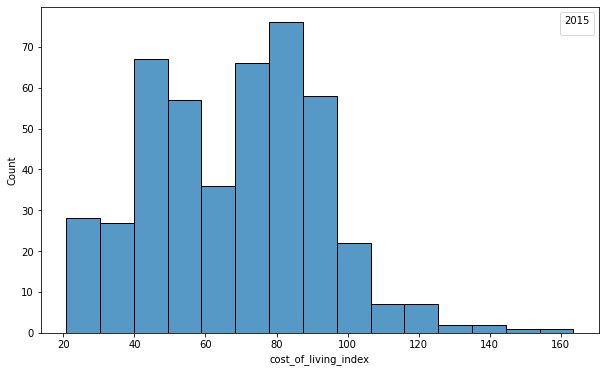

In [213]:
# Importamos las librerias necesarias para gráficar nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns 

# Graficamos para 2015
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2015]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2015")
plt.show()

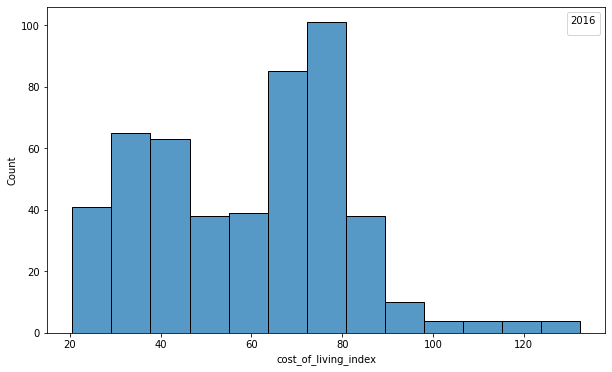

In [214]:
# Graficamos para 2016
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2016]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2016")
plt.show()

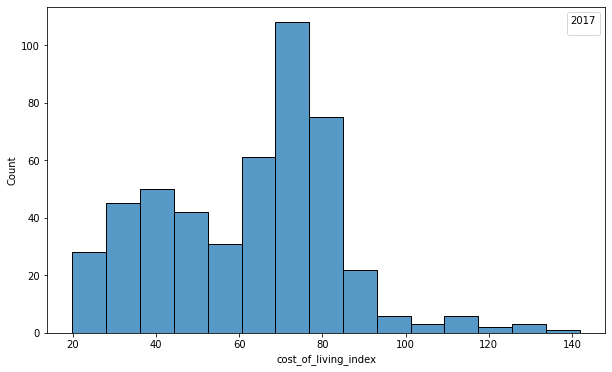

In [215]:
# Graficamos para 2017
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2017]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2017")
plt.show()

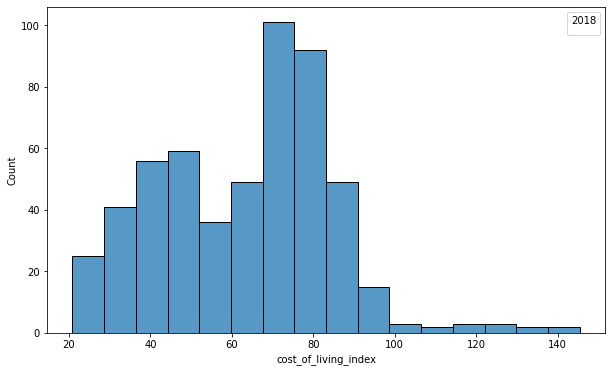

In [216]:
# Graficamos para 2018
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2018]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2018")
plt.show()

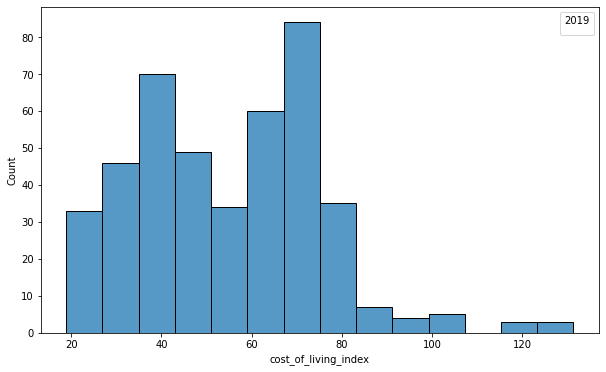

In [217]:
# Graficamos para 2019
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2019]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2019")
plt.show()

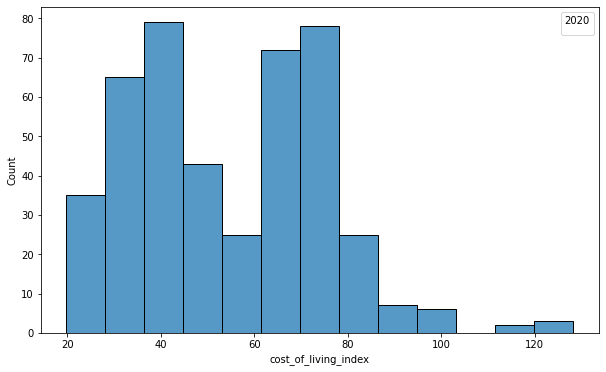

In [218]:
# Graficamos para 2020
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2020]
sns.histplot(df_aux.cost_of_living_index)
plt.legend(title="2020")
plt.show()

CONCLUSIÓN: A grandes rasgos, existe una tendencia de los índices de costo de vida (sin alquiler) a acumularse en intervalos de 30 a 50 y de 60 a 80 unidades monetarias.

### Ejercicio 3.3 

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [219]:
rol_seed = 201810521  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
my_cities

array(['Mannheim, Germany', 'Newcastle upon Tyne, United Kingdom',
       'Fairfax, VA, United States', 'Coventry, United Kingdom',
       'Hamilton, New Zealand', 'Poznan, Poland', 'Stavanger, Norway',
       'Fort Collins, CO, United States', 'Accra, Ghana', 'Nis, Serbia'],
      dtype=object)

In [220]:
d = {} # En este diccionario almacenamos los dataframes que concatenaremos para obtener una data personalizada para la lista de my_cities, que nos permitirá gráficar nuestros datos
for ciudad in my_cities:
  df_aux = life_cost[life_cost["city"] == ciudad]
  d[ciudad] = df_aux

df_aux = pd.concat(d, axis=0).reset_index()

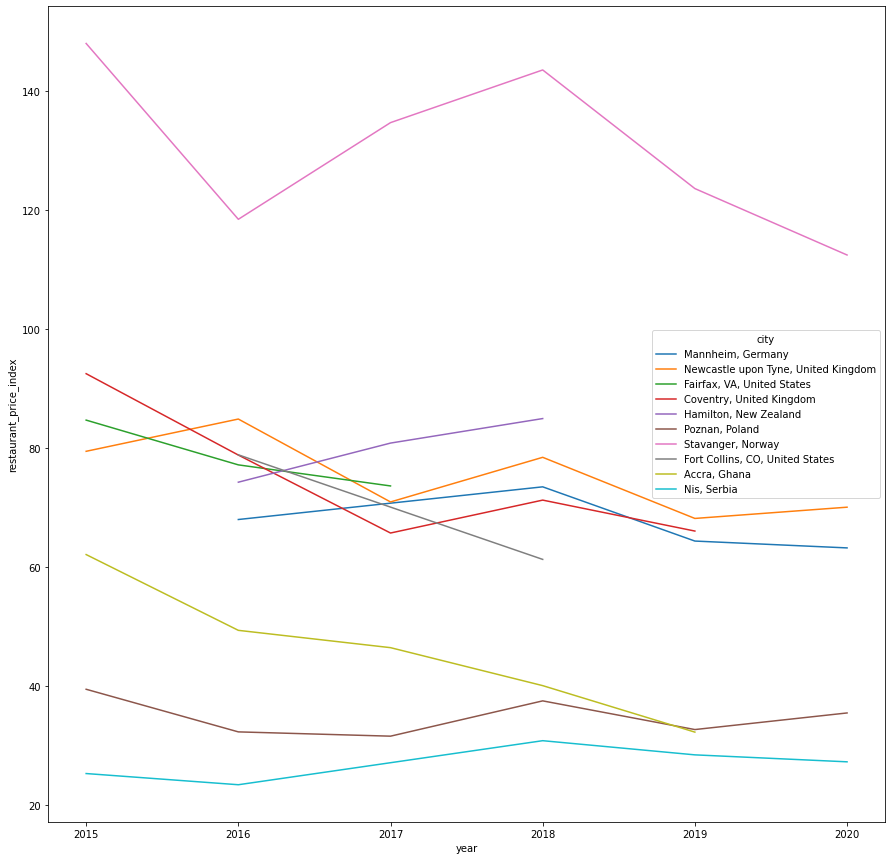

In [221]:
# Graficamos
plt.figure(figsize=(15, 15))
sns.lineplot(
    x='year',
    y='restaurant_price_index',
    hue="city",
    data=df_aux,
    ci = None,
    palette=None
)   
plt.show()

Se puede apreciar que en general, cada país se mantiene mas o menos en un rango de precios a lo largo del tiempo. Donde, el rango que parece repetirse mas en comparación a cada uno es entre 60 a 100. Y la razón por la cual no se toman todas las ciudades, es porque se saturaría demasiado el gráfico, sin dejar apreciar bien las realciones existentes

In [222]:
#Este es el código que muestra el mismo gráfico pero para todas las todas las ciudades, nose incluyó porque requiere bastante tiempo de ejecución

#plt.figure(figsize=(15, 15))
#sns.lineplot(
#   x='year',
#   y='restaurant_price_index',
#   hue="city",
#   data=life_cost,
#   ci = None,
#   palette=None
#)   
#plt.show()

### IV.- LearnPlatform

<img src="https://iltpp.org/wp-content/uploads/2020/11/LearnPlatform.png" width="480" height="360" align="center"/>

### Introducción

Nelson Mandela creía que la educación era el arma más poderosa para cambiar el mundo. Pero no todos los estudiantes tienen las mismas oportunidades de aprender. Es necesario promulgar políticas y planes efectivos para que la educación sea más equitativa, y tal vez su innovador análisis de datos ayude a revelar la solución.

La investigación actual muestra que los resultados educativos están lejos de ser equitativos. El desequilibrio se vio agravado por la pandemia de COVID-19. Existe una necesidad urgente de comprender y medir mejor el alcance y el impacto de la pandemia en estas inequidades.

La empresa de tecnología educativa LearnPlatform se fundó en 2014 con la misión de ampliar el acceso equitativo a la tecnología educativa para todos los estudiantes y profesores. Los distritos y estados utilizan el sistema integral de efectividad de la tecnología educativa de LearnPlatform para mejorar continuamente la seguridad, la equidad y la efectividad de su tecnología educativa. LearnPlatform lo hace generando una base de evidencia de lo que está funcionando y promulgándola en beneficio de los estudiantes, los profesores y los presupuestos.

En esta competencia de análisis, trabajará para descubrir tendencias en el aprendizaje digital. Logre esto con un análisis de datos sobre cómo el compromiso con el aprendizaje digital se relaciona con factores como la demografía del distrito, el acceso a la banda ancha y las políticas y eventos a nivel estatal / nacional. Luego, envíe un notebook de Kaggle para proponer su mejor solución a estas desigualdades educativas.

Sus presentaciones informarán las políticas y prácticas que cierran la brecha digital. Con una mejor comprensión de las tendencias de aprendizaje digital, puede ayudar a revertir la pérdida de aprendizaje a largo plazo entre los más vulnerables de Estados Unidos, haciendo que la educación sea más equitativa.

### Planteamiento del problema
La pandemia COVID-19 ha interrumpido el aprendizaje de más de 56 millones de estudiantes en los Estados Unidos. En la primavera de 2020, la mayoría de los gobiernos estatales y locales de los EE. UU. Cerraron las instituciones educativas para detener la propagación del virus. En respuesta, las escuelas y los maestros han intentado llegar a los estudiantes de forma remota a través de herramientas de aprendizaje a distancia y plataformas digitales. Hasta el día de hoy, las preocupaciones sobre la exacerbación de la brecha digital y la pérdida de aprendizaje a largo plazo entre los estudiantes más vulnerables de Estados Unidos continúan creciendo.

### Desafío
Los estudiantes deben explorar (1) el estado del aprendizaje digital en 2020 y (2) cómo la participación del aprendizaje digital se relaciona con factores como la demografía del distrito, el acceso a banda ancha y las políticas y eventos a nivel estatal/nacional.

Le recomendamos que oriente el análisis con preguntas relacionadas con los temas descritos anteriormente (en negrita). A continuación se muestran algunos ejemplos de preguntas que se relacionan con el planteamiento de nuestro problema:

* ¿Cuál es el panorama de la conectividad y el compromiso digitales en 2020?
* ¿Cuál es el efecto de la pandemia de COVID-19 en el aprendizaje en línea y a distancia, y cómo podría evolucionar también en el futuro?
* ¿Cómo cambia la participación de los estudiantes con los diferentes tipos de tecnología educativa durante el transcurso de la pandemia?
* ¿Cómo se relaciona la participación de los estudiantes con las plataformas de aprendizaje en línea con las diferentes geografías? ¿Contexto demográfico (por ejemplo, raza/etnia, ESL, discapacidad de aprendizaje)? Contexto de aprendizaje? ¿Estatus socioeconómico?
* ¿Se correlacionan ciertas intervenciones, prácticas o políticas estatales (por ejemplo, estímulo, reapertura, moratoria de desalojo) con el aumento o la disminución de la participación en línea?

### Evaluación


#### Claridad 

* ¿El autor presentó un hilo claro de preguntas o temas que motivaron su análisis?
* ¿El autor documentó por qué/cómo se eligió y utilizó un conjunto de métodos para su análisis?
* ¿Está documentado el notebook de una manera que sea fácilmente reproducible (p. Ej., Código, fuentes de datos adicionales, citas)?
* ¿El notebook contiene visualizaciones de datos claras que ayuden a comunicar de manera eficaz los hallazgos del autor tanto a expertos como a no expertos?

#### Precisión 

* ¿El autor procesó los datos (por ejemplo, fusionando) y/o fuentes de datos adicionales con precisión?
* ¿La metodología utilizada en el análisis es apropiada y razonable?
* ¿Son razonables y convincentes las interpretaciones basadas en el análisis y la visualización?

#### Creatividad 

* ¿El notebook ayuda al lector a aprender algo nuevo o lo desafía a pensar de una manera nueva?
* ¿El notebook aprovecha métodos novedosos y/o visualizaciones que ayudan a revelar información a partir de datos y/o comunicar hallazgos?
* ¿El autor utilizó fuentes de datos públicas adicionales en su análisis?

#### Hints

* Esto corresponde a un desafio de Kaggle ([link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview/description)).
* La descripción de las columnas, lo pueden encontrar en el siguiente [link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data).
* Los datos del desafio se encuentran en el siguiente [link](https://drive.google.com/drive/folders/15t3gGwGNazuW5Zs4Mj_9_d2sMJdJg7qo).
* A modo de inspiración, pueden ocupar algunos gráficos de otros participantes del desafío ([link](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/code)).

In [275]:
# libraries
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
# read data

## products dataset
path = 'data/learnplatform-covid19-impact-on-digital-learning/'
products_df = pd.read_csv(path + "products_info.csv")
products_df.columns = [x.lower().replace(' ','_') for x in products_df.columns]

In [277]:
## districts dataset
districts_df = pd.read_csv(path +"districts_info.csv")
# Se limpian los datos (eliminación de filas con nan)
districts_df = districts_df[districts_df.state.notna()].reset_index(drop=True)
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
171,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
172,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
173,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [258]:
## engagement dataset
path = 'data/learnplatform-covid19-impact-on-digital-learning/engagement_data/' 
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[-1].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
engagement_df = pd.concat(li)
engagement_df = engagement_df.reset_index(drop=True)

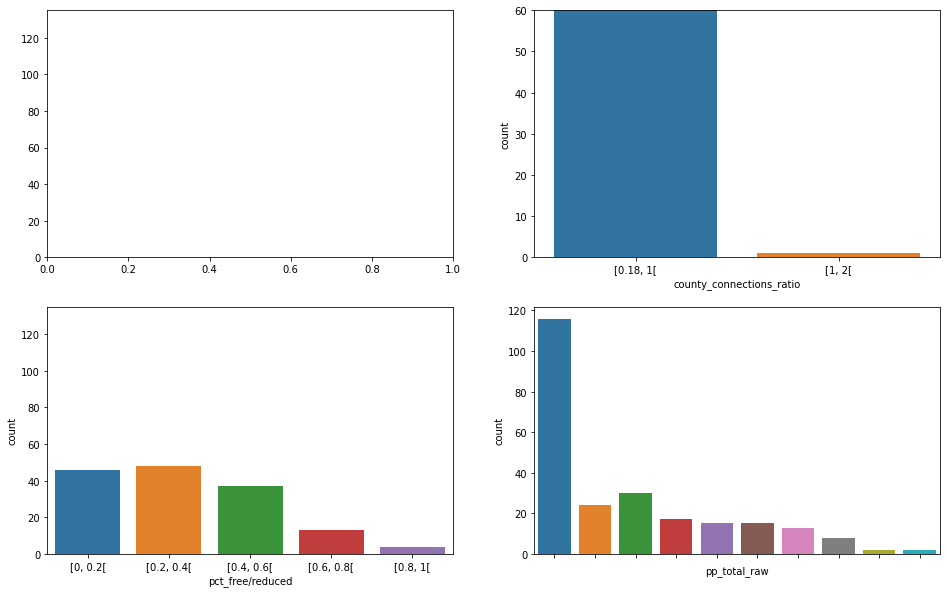

In [307]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

# Realizamos un conteo de cada variable de interés, como parte del proceso de nuestro análsisis exploratorio

sns.countplot(data=districts_df, x='pct_free/reduced', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], ax=ax[1,0])
ax[0,1].set_ylim([0,60])

sns.countplot(data=districts_df, x='pct_black/hispanic', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], ax=ax[1,1])
ax[0,0].set_ylim([0,135])

sns.countplot(data=districts_df, x='county_connections_ratio', ax=ax[0,1], )
ax[1,0].set_ylim([0,135])

sns.countplot(data=districts_df, x='pp_total_raw', order=['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[','[12000, 14000[', '[14000, 16000[', '[16000, 18000[', '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ], ax=ax[1,1])

ax[1,1].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45) # Esto es para que se vean mejor los ejes en pp_total_raw

plt.show()

In [302]:
# Dividimos la función esencial primaria en términos de funciones principales y secundarias, de este modo preparamos los datos para realizar un recuento categórico en funciones primarias
products_df['primary_function_main'] = products_df['primary_essential_function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_df['primary_function_sub'] = products_df['primary_essential_function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

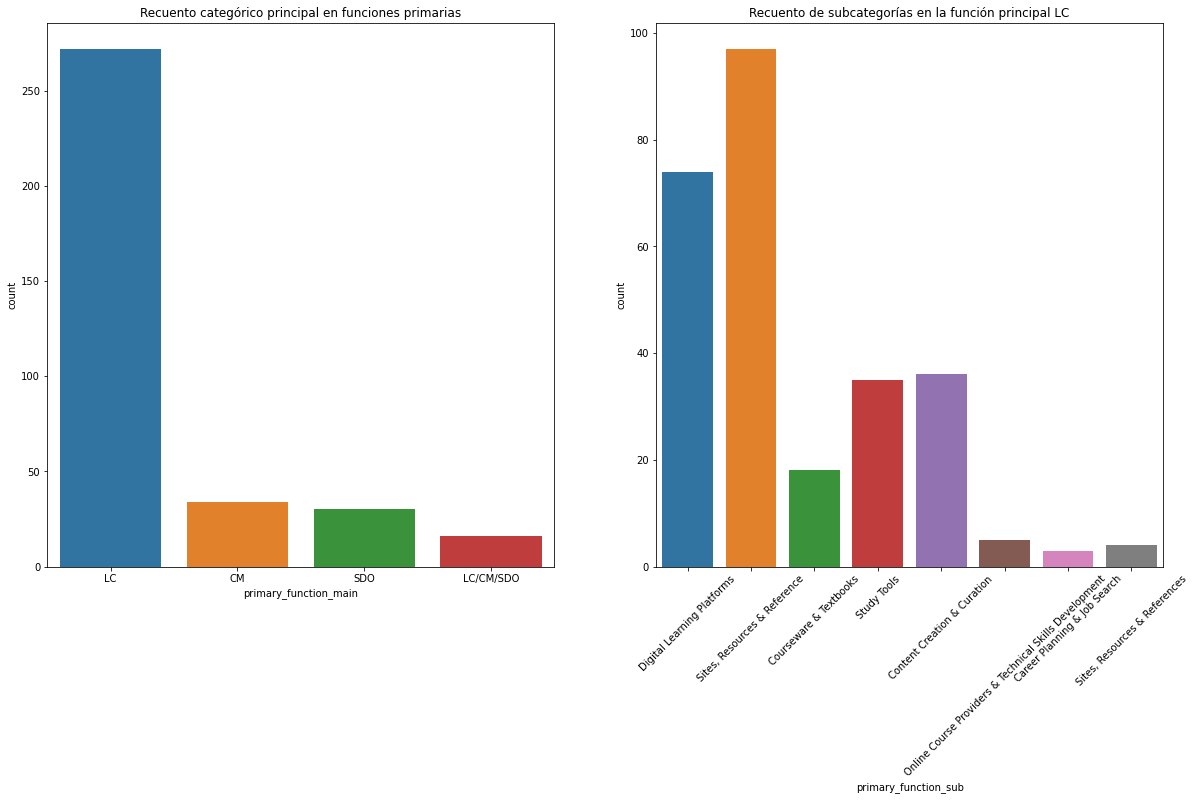

In [306]:
# Agregamos más gráficos a nuestro análisis
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(data=products_df, x='primary_function_main', ax=ax[0])
ax[0].set_title('Recuento categórico principal en funciones primarias')

sns.countplot(data=products_df[products_df.primary_function_main == 'LC'], x='primary_function_sub', ax=ax[1])
ax[1].set_title('Recuento de subcategorías en la función principal LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.show()

Conclusión: 
Dependiendo de lo que desee lograr, se debe tener especial énfasis en el districto seleccionado. Se puede ver que la clave está en aplicar eficazmente las herramientas del aprendizaje digital, que es muy útil para adquirir conocimientos durante la pandemia.